<a href="https://colab.research.google.com/github/MahimnaDarji/Self-Practice/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

#Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading the CSV File

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Train.csv')

#Display Top 5 Elements

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Display Bottom 5 Elements

In [ ]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.size

10692

In [ ]:
data.shape

(891, 12)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

#Dropping Unwanted Columns

In [ ]:
data=data.drop(['Embarked','Cabin','Fare','Ticket','Parch','SibSp'],axis=1)

In [ ]:
data.shape

(891, 6)

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
dtype: int64

#Label Encoder
(Converts Male,Female/True,False to 0,1 type

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbn=LabelEncoder()
X=data.iloc[:,3].values
data.iloc[:,3]=lbn.fit_transform(X)
X=X.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbn=LabelEncoder()
X=data.iloc[:,4].values
data.iloc[:,4]=lbn.fit_transform(X)
X=X.reshape(-1,1)

#Dealing with Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.NaN,strategy='mean')
X=data.iloc[:,5].values
X=X.reshape(-1,1)
data.iloc[:,5]=si.fit_transform(X)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
dtype: int64

In [ ]:
X=data[['PassengerId','Survived',	'Name',	'Pclass',	'Age']]
Y=data['Sex']

#Applying Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
print(X_train)

     PassengerId  Survived  Name  Pclass        Age
646          647         0   180       3  19.000000
528          529         0   725       3  39.000000
316          317         1   423       2  24.000000
197          198         0   611       3  42.000000
526          527         1   689       2  50.000000
..           ...       ...   ...     ...        ...
115          116         0   645       3  21.000000
31            32         1   776       1  29.699118
617          618         0   488       3  26.000000
738          739         0   389       3  29.699118
669          670         1   802       1  29.699118

[668 rows x 5 columns]


#MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_train_min=ms.fit_transform(X_train)
X_test_min=ms.transform(X_test)

#StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_norm=ss.fit_transform(X_train)
X_test_norm=ss.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_train_pca=pca.transform(X_train)
X_tesr_pca=pca.fit_transform(X_test)
X_test_pca=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.51027019, 0.4885804 ])

#K-Nearest Neighbor Model

Accuracy= 79.82062780269058 %
              precision    recall  f1-score   support

        male       0.71      0.66      0.68        73
      female       0.84      0.87      0.85       150

    accuracy                           0.80       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.80      0.80      0.80       223



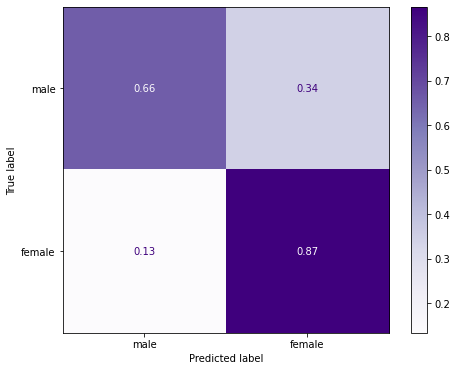

In [ ]:
#KNN MinMax
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_min,Y_train)
prediction=knn.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names = ['male','female']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))
cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')

Accuracy= 80.26905829596413 %
              precision    recall  f1-score   support

        male       0.67      0.78      0.72        73
      female       0.88      0.81      0.85       150

    accuracy                           0.80       223
   macro avg       0.78      0.80      0.78       223
weighted avg       0.81      0.80      0.81       223



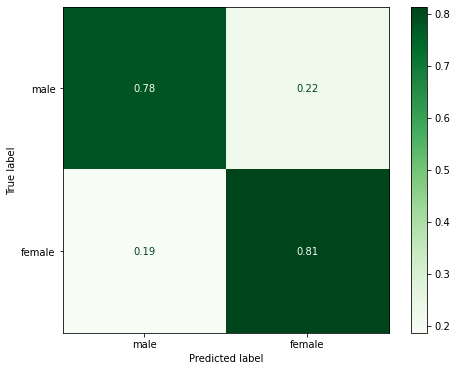

In [ ]:
#KNN Standard Scaler
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_norm,Y_train)
prediction=knn.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

Accuracy= 59.19282511210763 %
              precision    recall  f1-score   support

        male       0.26      0.14      0.18        73
      female       0.66      0.81      0.73       150

    accuracy                           0.59       223
   macro avg       0.46      0.48      0.45       223
weighted avg       0.53      0.59      0.55       223



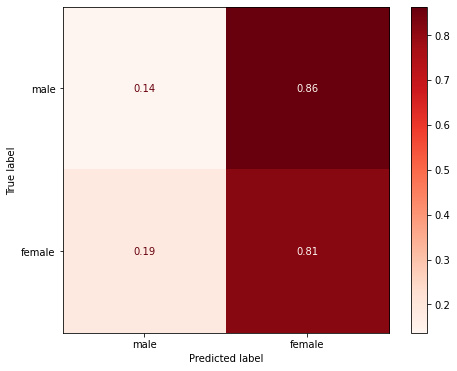

In [ ]:
#KNN PCA
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca,Y_train)
prediction=knn.predict(X_test_pca)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Reds')

#Logistic Regression Model

Accuracy= 83.40807174887892 %
              precision    recall  f1-score   support

        male       0.71      0.84      0.77        73
      female       0.91      0.83      0.87       150

    accuracy                           0.83       223
   macro avg       0.81      0.83      0.82       223
weighted avg       0.85      0.83      0.84       223



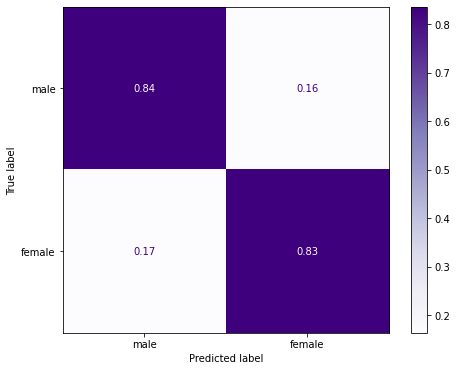

In [ ]:
#Logistic Regression MinMax
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train_min,Y_train)
prediction=lgr.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')

#Naive Bayes Model

Accuracy= 83.40807174887892 %
              precision    recall  f1-score   support

        male       0.71      0.84      0.77        73
      female       0.91      0.83      0.87       150

    accuracy                           0.83       223
   macro avg       0.81      0.83      0.82       223
weighted avg       0.85      0.83      0.84       223



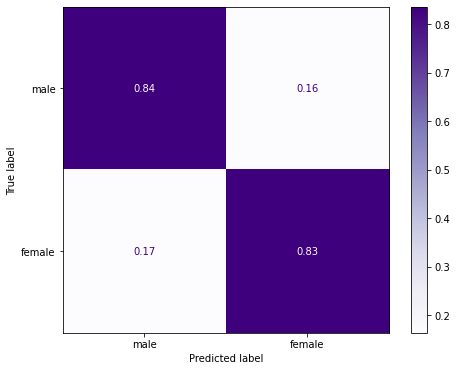

In [ ]:
#NaiveBayes MinMax
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_min,Y_train)
prediction=nb.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')

Accuracy= 83.40807174887892 %
              precision    recall  f1-score   support

        male       0.71      0.84      0.77        73
      female       0.91      0.83      0.87       150

    accuracy                           0.83       223
   macro avg       0.81      0.83      0.82       223
weighted avg       0.85      0.83      0.84       223



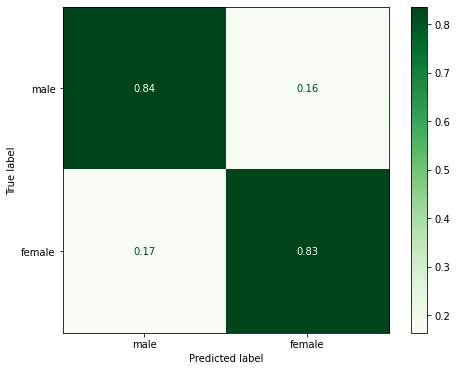

In [ ]:
#NaiveBayes StandardScaler
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_norm,Y_train)
prediction=nb.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

#Support Vector Machine Model

Accuracy= 82.95964125560538 %
              precision    recall  f1-score   support

        male       0.71      0.82      0.76        73
      female       0.91      0.83      0.87       150

    accuracy                           0.83       223
   macro avg       0.81      0.83      0.81       223
weighted avg       0.84      0.83      0.83       223



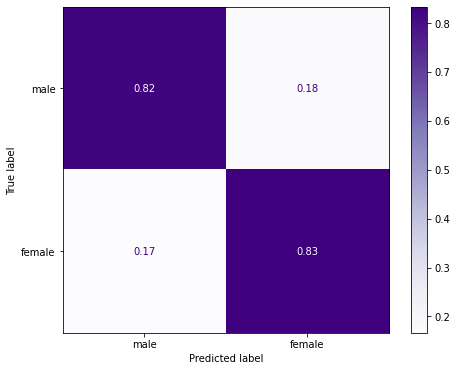

In [ ]:
#Support Vector Machine MinMax
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_min,Y_train.values.ravel())
prediction=svm.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')

Accuracy= 82.95964125560538 %
              precision    recall  f1-score   support

        male       0.71      0.82      0.76        73
      female       0.91      0.83      0.87       150

    accuracy                           0.83       223
   macro avg       0.81      0.83      0.81       223
weighted avg       0.84      0.83      0.83       223



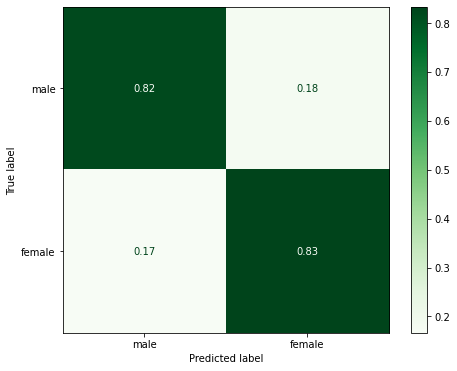

In [ ]:
#Support Vector Machine StandardScaler
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_norm,Y_train.values.ravel())
prediction=svm.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

#Decision Tree Model

Accuracy= 83.40807174887892 %
              precision    recall  f1-score   support

        male       0.71      0.84      0.77        73
      female       0.91      0.83      0.87       150

    accuracy                           0.83       223
   macro avg       0.81      0.83      0.82       223
weighted avg       0.85      0.83      0.84       223



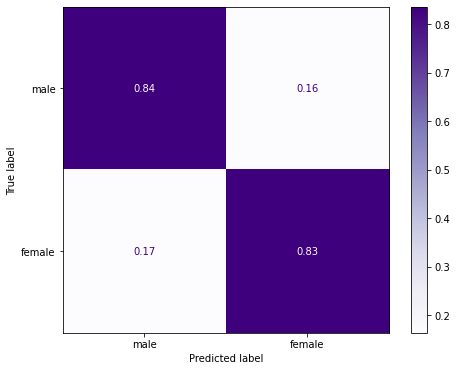

In [ ]:
#Decision Tree MinMax
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=0)
dt.fit(X_train_min,Y_train)
prediction=dt.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')

Accuracy= 82.51121076233184 %
              precision    recall  f1-score   support

        male       0.70      0.82      0.75        73
      female       0.91      0.83      0.86       150

    accuracy                           0.83       223
   macro avg       0.80      0.82      0.81       223
weighted avg       0.84      0.83      0.83       223



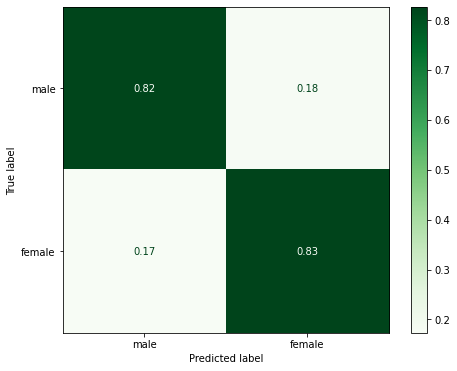

In [ ]:
#Decision Tree Standard Scaler
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dt.fit(X_train_norm,Y_train)
prediction=dt.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

#Random Forest Model

Accuracy= 79.82062780269058 %
              precision    recall  f1-score   support

        male       0.71      0.66      0.68        73
      female       0.84      0.87      0.85       150

    accuracy                           0.80       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.80      0.80      0.80       223



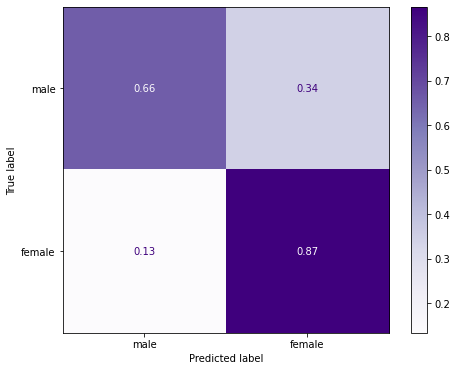

In [ ]:
#Random Forest MinMax
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier(n_estimators=50)
dt.fit(X_train_min,Y_train)
prediction=dt.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')

Accuracy= 80.26905829596413 %
              precision    recall  f1-score   support

        male       0.68      0.74      0.71        73
      female       0.87      0.83      0.85       150

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.81      0.80      0.80       223



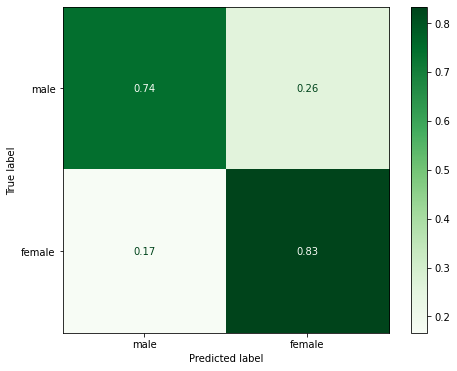

In [ ]:
#Random Forest Standard Scaler
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier(n_estimators=100)
dt.fit(X_train_norm,Y_train)
prediction=dt.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print('Accuracy=',accuracy*100,'%')

target_names=['male','female']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')